# Libs

In [2]:
# !pip install imblearn

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import json
import matplotlib.patheffects as PathEffects
import matplotlib.patches as patches
from gera_grafico_classes import grafico_classes
from matriz_confusao import matriz_confusao


# Paleta de cores

In [4]:
with open(r"../reports/paleta_cores.json") as f:
    data = json.load(f)
    paleta = data['colors']['dataColors']
    BadPalette = data['colors']['dataColorsBadVariation']
    GoodPalette = data['colors']['dataColorsGoodVariation']
    PrincipalPallete = data['colors']['dataColorsPrincipalVariation']

# Aplicando a paleta personalizada ao Seaborn 
sns.set_palette(paleta)

# Importando os dados

In [5]:
df = pd.read_csv(r'~\Desktop\tcc_mba_icmc\data\data_curated.csv')
# pd.read_csv('https://raw.githubusercontent.com/Felisouza/tcc_mba_icmc/refs/heads/main/data/data_curated.csv')

df.head()

,VlReceitaEsperada,NrParcelas,NmProduto,GrupoProduto,NmTomador,GrupoEconomico,PremioBrutoModDiv,Parcela,ValorParcela,PeriodicidadeMes,...,NOME_SEGURADORA_FINAL_ef29ca0b017f73a647d7b93280e327d67d04c9652505835f839961ffe016abb7,NOME_SEGURADORA_FINAL_ef57e5a22f3c1af190f69cf24780a85ab939296b8a2110f10345c7332612e229,NOME_SEGURADORA_FINAL_efa51d1b726310b3be0cedf18cbabe6c68897d1e2a3cdeff5340db5f5033174b,NOME_SEGURADORA_FINAL_f196974014aad82f9f373bc80500b53092da47b34c67e5a7122ec938fe5775d4,NOME_SEGURADORA_FINAL_f47000b596b290f24cb54e3a8d7f11be387c60d3cfa521817955b6b3c6ae59fa,NOME_SEGURADORA_FINAL_f48e40067a48047401e9e4bcc18fea55cfa0b88e9c3468f7bb0bc897609d712d,NOME_SEGURADORA_FINAL_f6b33afc342d2988e4c750108b804763b86da7fe0a2cd4e46fe4b423874dca2f,NOME_SEGURADORA_FINAL_fb28df294b075e74b80a5c02f4555c6031570106163066c246d482d112cabe1a,NOME_SEGURADORA_FINAL_fe11e9c51a77753fab092e2968abfbe249ba79e8d93ea93273bf3b8bc06ebc94,NOME_SEGURADORA_FINAL_fedb1b2600b69c711cb7b2a5fde86df6c0f8623cd7e525e91915fe485feabc8a
0,0,1,9cdafbed10c0d51c62c70109841e569900f978bb7524ef...,54eb3384177a6f1bce36ebf478c32787a128b43144b901...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,4349,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,528,1,c68cb6c1bac51b9b18fe707b35d142a54e67f06780c358...,243f77a913aad6b64b4c73b481c94fce10c1554fbe86d1...,7b0c6f6a92137fc18c4accdaf9dc8eb1b7d105496a126e...,e468ad81880f4156af507e2d09f2c6c1746f356460dce0...,2346,1,528,1,...,False,False,False,False,False,False,False,False,False,False
2,66,1,f22e67f434917d011b2a3f8463d63bdf4acf6ddd14840b...,0048e821bb69ffdcd8f340d7d83aaefadea6b47377089b...,418fe50aa1ba9b6660f2afa031b6adf31bf7e7e892d43e...,418fe50aa1ba9b6660f2afa031b6adf31bf7e7e892d43e...,437,1,66,1,...,False,False,False,False,False,False,False,False,False,False
3,818,1,f22e67f434917d011b2a3f8463d63bdf4acf6ddd14840b...,0048e821bb69ffdcd8f340d7d83aaefadea6b47377089b...,9023625c4850288ff84f2dfa62d5bb0a4a6465c82e3c60...,9023625c4850288ff84f2dfa62d5bb0a4a6465c82e3c60...,5453,1,818,1,...,False,False,False,False,False,False,False,False,False,False
4,188,10,0c4302ab1690d261d113a63cb27c17d6e4c04edb378b5b...,541d9e89fcbd48ed2be6049a23f8cffbf4b492adea1c43...,d8629d6d970adfc91f2d7ea3c40ae8004883e9df78555f...,d8629d6d970adfc91f2d7ea3c40ae8004883e9df78555f...,1878,2,19,1,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.drop(columns=['Esteve_Inadimplente?_num', 'DifParcela', 'DifData'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867279 entries, 0 to 1867278
Columns: 103 entries, VlReceitaEsperada to NOME_SEGURADORA_FINAL_fedb1b2600b69c711cb7b2a5fde86df6c0f8623cd7e525e91915fe485feabc8a
dtypes: bool(89), int64(8), object(6)
memory usage: 357.9+ MB


# Train, test, validation

In [8]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['Esteve_Inadimplente?'])

# Dividir os dados em conjunto de treino + validação e conjunto de teste (70% treino + validação, 30% teste)
X = df.select_dtypes(include=['int64', 'float64'])
y = df['target']

In [9]:
label_encoder.classes_

array(['NÃO', 'SIM'], dtype=object)

# Undersampling

In [10]:
# Definindo a estratégia de undersampling
under = RandomUnderSampler(sampling_strategy=0.5)

# Aplicando a técnica de undersampling
X_resampled, y_resampled = under.fit_resample(X, y)

# Verificando a nova distribuição de classes
df_resampled = pd.DataFrame(X_resampled)
df_resampled['target'] = y_resampled
print("\nDistribuição de classes após undersampling:")
print(df_resampled['target'].value_counts())




Distribuição de classes após undersampling:
target
0    20240
1    10120
Name: count, dtype: int64


In [11]:
df_resampled

,VlReceitaEsperada,NrParcelas,PremioBrutoModDiv,Parcela,ValorParcela,PeriodicidadeMes,VlComissao_co,trimestre,target
724192,46,1,310,1,46,1,120,2,0
1520555,81,1,540,1,81,1,0,2,0
1051949,1605,1,6419,1,1605,1,1605,3,0
1678007,34,1,226,1,34,1,34,4,0
1547308,120,1,546,1,120,1,0,2,0
...,...,...,...,...,...,...,...,...,...
1864637,48,1,190,1,48,1,48,3,1
1865145,8406,1,44242,1,8406,1,8406,3,1
1866781,1920,1,9600,1,1920,1,0,2,1
1867250,150,1,600,1,150,1,0,4,1


### Gráficos classes

c:\Users\felipebatista\Desktop\tcc_mba_icmc\models\gera_grafico_classes.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='percentual', data=class_counts, palette=paleta[:2], ax=ax)


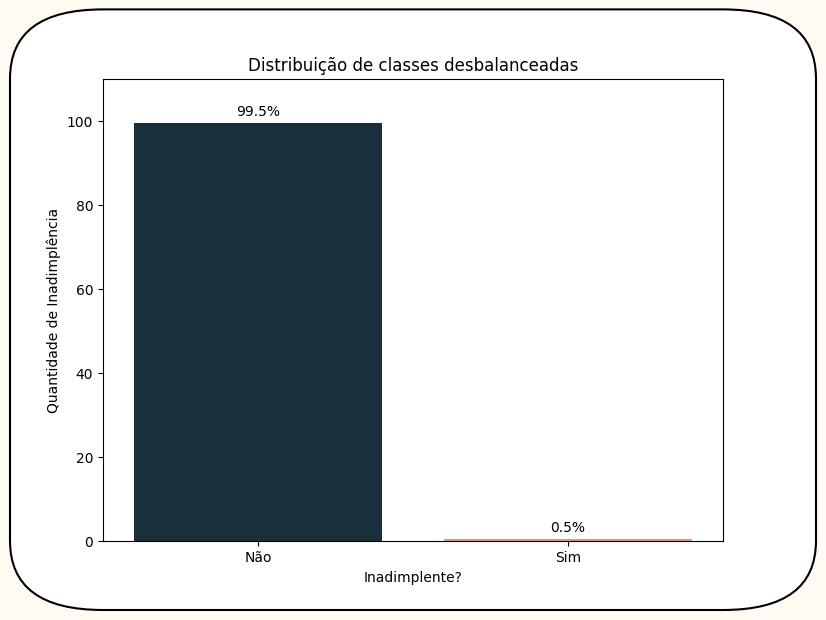

In [12]:
grafico_classes(df, 'Distribuição de classes desbalanceadas')

c:\Users\felipebatista\Desktop\tcc_mba_icmc\models\gera_grafico_classes.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='percentual', data=class_counts, palette=paleta[:2], ax=ax)


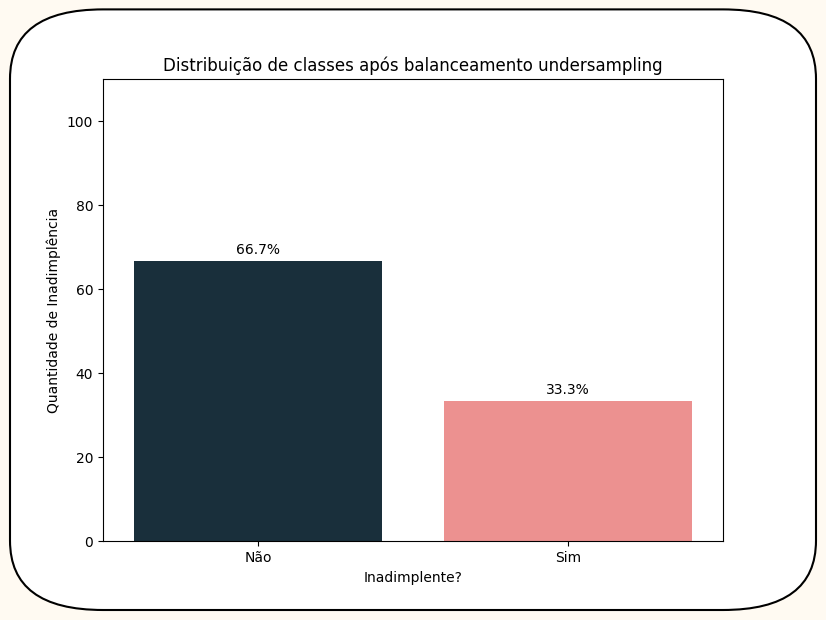

In [13]:
grafico_classes(df_resampled, 'Distribuição de classes após balanceamento undersampling')

### Treino e teste undersampling

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [15]:
# Mostrar os tamanhos dos conjuntos 
print(
    f'Tamanho do conjunto de treino: {len(X_train)}\n', 
    f'Tamanho do conjunto de validação: {len(X_val)}\n', 
    f'Tamanho do conjunto de teste: {len(X_test)} \n'
)

Tamanho do conjunto de treino: 18216
 Tamanho do conjunto de validação: 6072
 Tamanho do conjunto de teste: 6072 



# Regressão Logística

## Treino

In [16]:
# Treinar o modelo de Regressão Logística
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

C:\Users\felipebatista\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Validação

In [17]:
# Fazer previsões no conjunto de validação
y_val_pred1 = logistic_regression.predict(X_val)

# Avaliar o modelo no conjunto de validação
val_accuracy = accuracy_score(y_val, y_val_pred1)
val_report = classification_report(y_val, y_val_pred1, target_names=label_encoder.classes_)

print('Regressão Logística')
print(f'Validação - Accuracy: {val_accuracy}')
print('Validação - Classification Report:')
print(val_report)

Regressão Logística
Validação - Accuracy: 0.6856060606060606
Validação - Classification Report:
              precision    recall  f1-score   support

         NÃO       0.69      0.99      0.81      4105
         SIM       0.68      0.05      0.10      1967

    accuracy                           0.69      6072
   macro avg       0.68      0.52      0.46      6072
weighted avg       0.68      0.69      0.58      6072



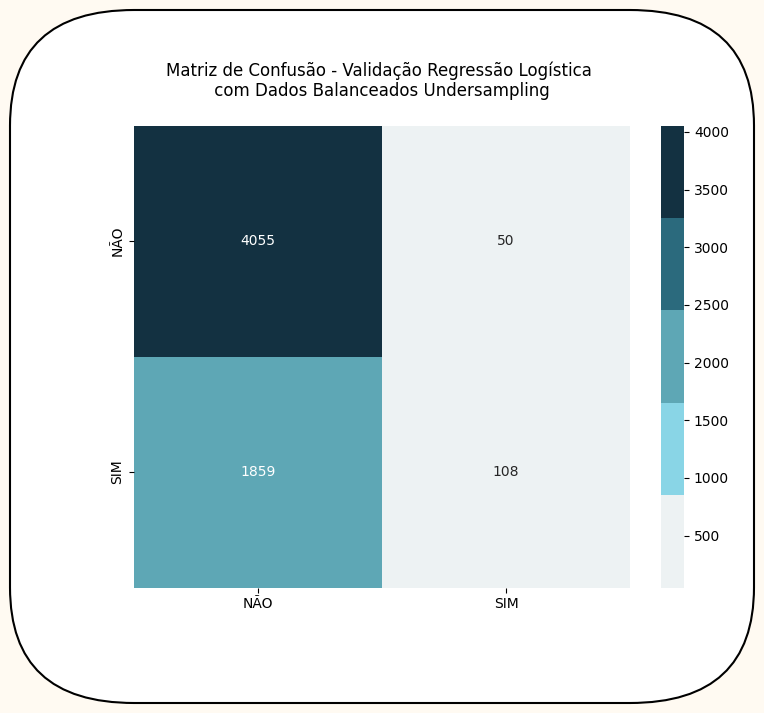

In [32]:

matriz_confusao(y_val, y_val_pred1, PrincipalPallete, titulo='Matriz de Confusão - Validação Regressão Logística \n com Dados Balanceados Undersampling \n')

## Teste

In [19]:


# # Fazer previsões no conjunto de teste
# y_test_pred = logistic_regression.predict(X_test)

# # Avaliar o modelo no conjunto de teste
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

# print(f'Teste - Accuracy: {test_accuracy}')
# print('Teste - Classification Report:')
# print(test_report)


# Random Forest

## Treino

In [20]:
# Treinar o modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

## Validação


In [21]:
# Fazer previsões no conjunto de validação
y_val_pred2 = rf_classifier.predict(X_val)

# Avaliar o modelo no conjunto de validação
val_accuracy = accuracy_score(y_val, y_val_pred2)
val_report = classification_report(y_val, y_val_pred2, target_names=label_encoder.classes_)

print('Random Forest')
print(f'Validação - Accuracy: {val_accuracy}')
print('Validação - Classification Report:')
print(val_report)

Random Forest
Validação - Accuracy: 0.9056324110671937
Validação - Classification Report:
              precision    recall  f1-score   support

         NÃO       0.94      0.92      0.93      4105
         SIM       0.84      0.88      0.86      1967

    accuracy                           0.91      6072
   macro avg       0.89      0.90      0.89      6072
weighted avg       0.91      0.91      0.91      6072



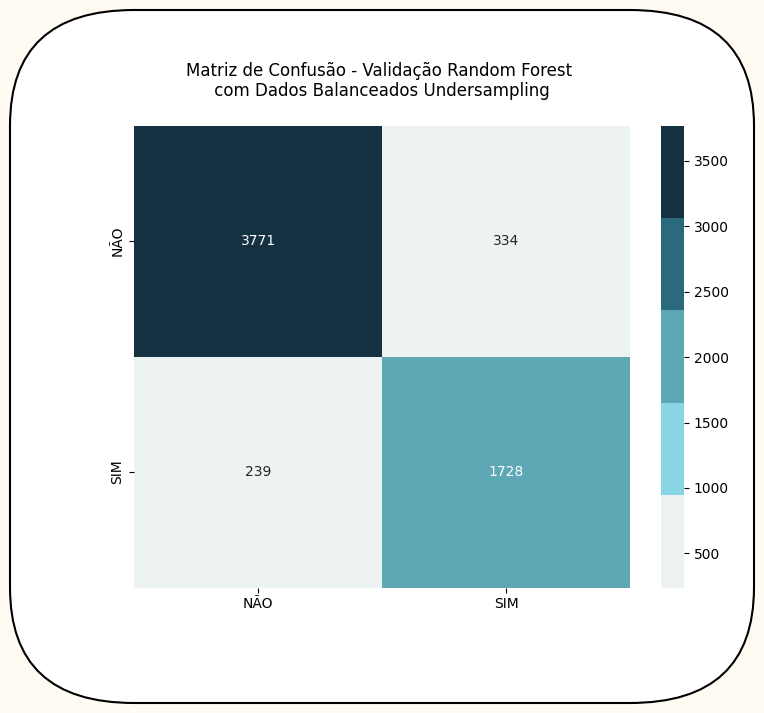

In [31]:
matriz_confusao(y_val, y_val_pred2, PrincipalPallete, titulo='Matriz de Confusão - Validação Random Forest \n com Dados Balanceados Undersampling \n')

In [23]:

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
    'criterion':['entropy', 'gini']
}

In [24]:
# grid_search = GridSearchCV(RandomForestClassifier(), 
#                            param_grid=param_grid) 
# grid_search.fit(X_train, y_train) 
# print(grid_search.best_estimator_) 

## Teste

In [25]:

# # Fazer previsões no conjunto de teste
# y_test_pred = rf_classifier.predict(X_test)

# # Avaliar o modelo no conjunto de teste
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

# print(f'Teste - Accuracy: {test_accuracy}')
# print('Teste - Classification Report:')
# print(test_report)


# XGBoost

## Treino

In [26]:
# Treinar o modelo XGBoost
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)

C:\Users\felipebatista\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:17:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Validação

In [27]:
# Fazer previsões no conjunto de validação
y_val_pred3 = xgb_classifier.predict(X_val)

# Avaliar o modelo no conjunto de validação
val_accuracy = accuracy_score(y_val, y_val_pred3)
val_report = classification_report(y_val, y_val_pred3, target_names=label_encoder.classes_)

print('XGBoost')
print(f'Validação - Accuracy: {val_accuracy}')
print('Validação - Classification Report:')
print(val_report)



XGBoost
Validação - Accuracy: 0.9046442687747036
Validação - Classification Report:
              precision    recall  f1-score   support

         NÃO       0.94      0.91      0.93      4105
         SIM       0.83      0.89      0.86      1967

    accuracy                           0.90      6072
   macro avg       0.89      0.90      0.89      6072
weighted avg       0.91      0.90      0.91      6072



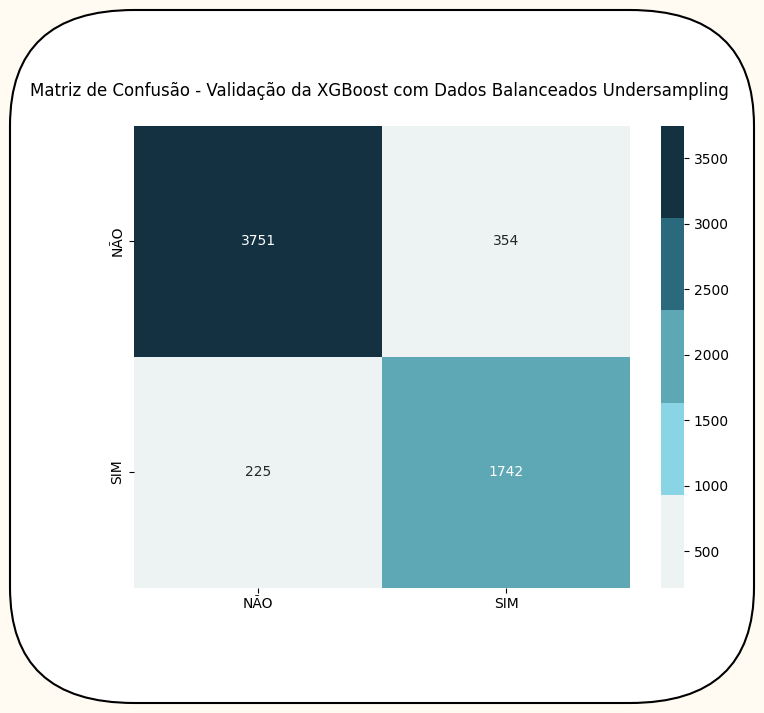

In [28]:
matriz_confusao(y_val, y_val_pred3, PrincipalPallete, titulo='Matriz de Confusão - Validação da XGBoost com Dados Balanceados Undersampling \n')

## Teste

In [29]:
# # Fazer previsões no conjunto de teste
# y_test_pred = xgb_classifier.predict(X_test)

# # Avaliar o modelo no conjunto de teste
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

# print(f'Teste - Accuracy: {test_accuracy}')
# print('Teste - Classification Report:')
# print(test_report)